In [96]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from sklearn.preprocessing import LabelEncoder
import re
import ast

# Exploratory Data Analysis
Exploratory Data Analysis (EDA) helps you understand the dataset, identify patterns, detect anomalies, and form hypotheses that guide your preprocessing steps. By analyzing the raw data first, decisions can be made for cleaning and tranforming of the data.

## Helpful Methods

In [20]:
def column_statistics(df):

    """
    Calculates statistics for each column in the input DataFrame to examine preprocessing steps.

    Parameters:
    - df (DataFrame): The input DataFrame to analyze.

    Returns:
    DataFrame: A DataFrame containing statistics for each column, including:
        - Num_Values: Total number of values in the column.
        - Num_Not_Null: Number of non-null values in the column.
        - Highest_Value: Highest value in the column (for numeric and string columns).
        - Lowest_Value: Lowest value in the column (for numeric and string columns).
        - Num_Unique: Number of unique values in the column (for numeric and string columns).
        - Percent_Not_Null: Percentage of non-null values in the column.
        - Percent_Null: Percentage of null values in the column.
        - Percentage_0: Percentage of occurrences of the value '0' (for binary columns).
        - Percentage_1: Percentage of occurrences of the value '1' (for binary columns).

    Example:
    ```
    # Calculate statistics for each column in the DataFrame 'df'
    stats_df = column_statistics(df)
    ```
    """

    stats = {}
    total_entries = len(df)

    for column in df.columns:
        column_data = df[column]
        num_values = len(column_data)
        num_not_null = column_data.count()
        num_null = num_values - num_not_null
        num_unique = None
        highest_value = None
        lowest_value = None
        percentage_0 = None
        percentage_1 = None

        if pd.api.types.is_numeric_dtype(column_data):
            highest_value = column_data.max()
            lowest_value = column_data.min()
            try:
                num_unique = column_data.nunique()
            except TypeError:
                pass

        if pd.api.types.is_string_dtype(column_data):
            highest_value = column_data.max()
            lowest_value = column_data.min()
            try:
                num_unique = column_data.nunique()
            except TypeError:
                pass

        if num_unique == 2:
            percentages = column_data.value_counts(normalize=True) * 100
            percentage_0 = percentages.get(0, 0)
            percentage_1 = percentages.get(1, 0)

        stats[column] = {
            'Num_Values': num_values,
            'Num_Not_Null': num_not_null,
            'Highest_Value': highest_value,
            'Lowest_Value': lowest_value,
            'Num_Unique': num_unique,
            'Percent_Not_Null': (num_not_null / total_entries) * 100,
            'Percent_Null': (num_null / total_entries) * 100,
            'Percentage_0': percentage_0,
            'Percentage_1': percentage_1
        }

    return pd.DataFrame(stats).T

## Ratings

In [7]:
# Load Data
path = os.path.expanduser('../data/Kindle_Store_5.json.gz')
ratings = pd.read_json(path, lines=True, dtype= {'reviewerID': str, 'asin': str, 'overall': str, 'reviewTime': str})

In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222983 entries, 0 to 2222982
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         object
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(1), object(10)
memory usage: 188.7+ MB


In [21]:
column_statistics(ratings)

,Num_Values,Num_Not_Null,Highest_Value,Lowest_Value,Num_Unique,Percent_Not_Null,Percent_Null,Percentage_0,Percentage_1
overall,1257651,1257651,5.0,1.0,5,100.0,0.0,None,None
verified,1257651,1257651,True,False,2,100.0,0.0,57.07593,42.92407
reviewTime,1257651,1257651,"12 9, 2017","01 1, 2009",3667,100.0,0.0,None,None
reviewerID,1257651,1257651,AZZXPMZMAWYZC,A0020356UF96ZV361ST,23749,100.0,0.0,None,None
asin,1257651,1257651,B01HJENY3Y,B000FA5KK0,96922,100.0,0.0,None,None
style,1257651.0,1234068.0,NaN,NaN,NaN,98.124837,1.875163,NaN,NaN
reviewerName,1257651.0,1257566.0,NaN,NaN,NaN,99.993241,0.006759,NaN,NaN
reviewText,1257651.0,1257511.0,NaN,NaN,NaN,99.988868,0.011132,NaN,NaN
summary,1257651.0,1256531.0,NaN,NaN,NaN,99.910945,0.089055,NaN,NaN
unixReviewTime,1257651.0,1257651.0,1538524800.0,921110400.0,3667.0,100.0,0.0,NaN,NaN


In [13]:
ratings.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


In [50]:
print("Number of unique reviewer IDs:", len(ratings['reviewerID'].unique()))
print("Number of unique eBooks:", len(ratings['asin'].unique()))

Number of unique reviewer IDs: 23749
Number of unique eBooks: 96922


In [33]:
#Remove columns 
ratings = ratings.drop(['reviewText', 'summary', 'reviewTime', 'unixReviewTime', 'vote', 'image',  'reviewerName'], axis=1)
ratings.head()

,overall,verified,reviewTime,reviewerID,asin
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0
5,5.0,True,"06 14, 2015",A9DXGM6YGV14D,B000FA5KK0
6,3.0,True,"06 2, 2015",A3MF8G33UKQLGL,B000FA5KK0


In [37]:
# Grouping by reviewerID and counting the number of ratings
user_ratings_count = ratings.groupby('reviewerID').size().sort_values(ascending=False)

# Counting the occurrences of each rating
rating_counts = ratings['overall'].value_counts().sort_index().sort_values(ascending=False)

# Counting the users with the same rated ebooks
user_counts = user_ratings_count.value_counts().sort_values(ascending=False)

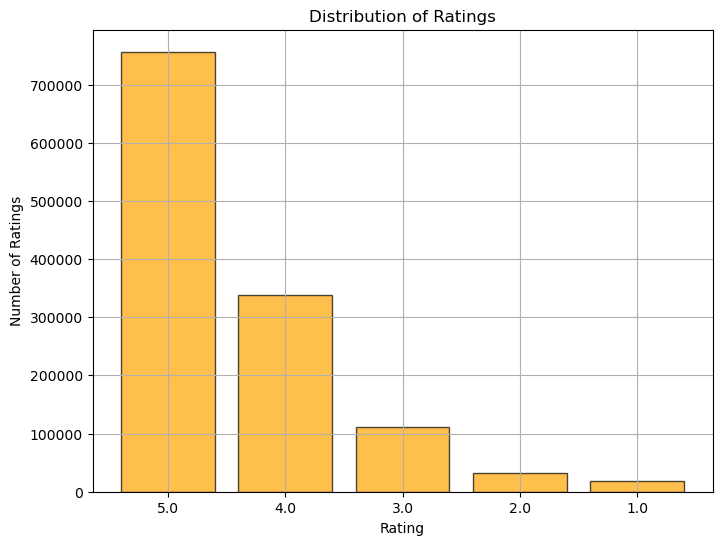

In [40]:
# Plotting the bar chart for distribution of overall ratings
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='orange', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.xticks(rating_counts.index)
plt.show()

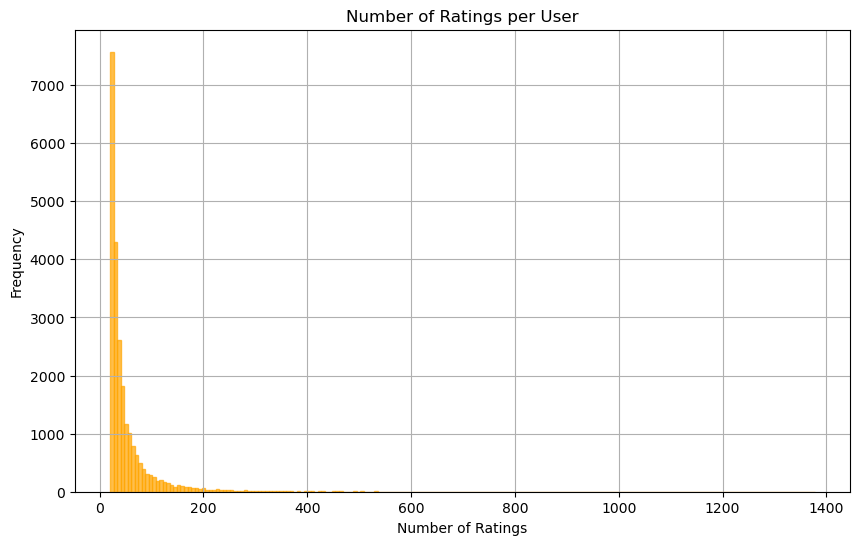

In [42]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count, bins=200, color='orange', edgecolor='orange', alpha=0.7)
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

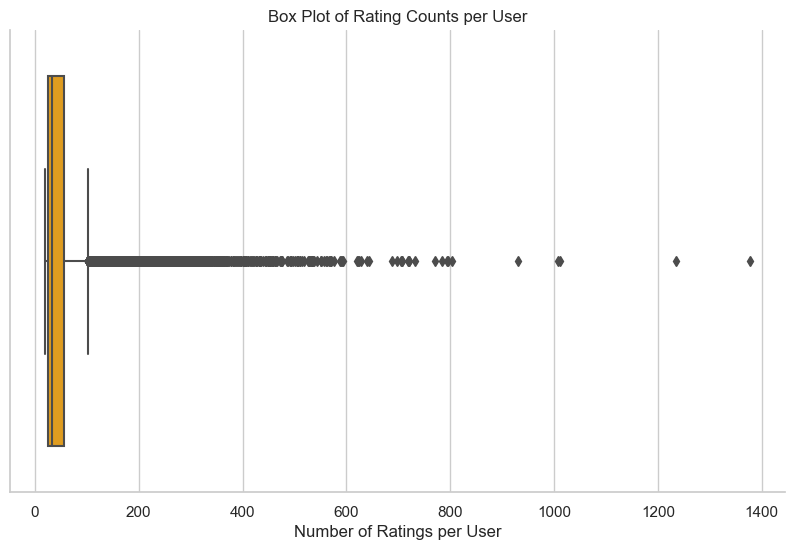

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a box plot of rating counts per user
sns.boxplot(x=user_ratings_count.values, color='orange', ax=ax)

# Set x-axis scale to logarithmic
#ax.set_xscale('log')

# Add titles and labels
plt.title('Box Plot of Rating Counts per User')
plt.xlabel('Number of Ratings per User')

# Remove top and right spines
sns.despine()

# Show plot
plt.show()


## Meta-Data

In [110]:
path = os.path.expanduser('../data/meta_Kindle_Store.json.gz')
meta_data = pd.read_json(path, lines=True, dtype= {'category': str})

In [111]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491670 entries, 0 to 491669
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   category         491670 non-null  object        
 1   tech1            491670 non-null  object        
 2   description      491670 non-null  object        
 3   fit              491670 non-null  object        
 4   title            491670 non-null  object        
 5   also_buy         491670 non-null  object        
 6   tech2            491670 non-null  object        
 7   brand            491670 non-null  object        
 8   feature          491670 non-null  object        
 9   rank             491670 non-null  object        
 10  also_view        491670 non-null  object        
 11  details          491670 non-null  object        
 12  main_cat         491670 non-null  object        
 13  similar_item     491670 non-null  object        
 14  date             0 n

In [112]:
column_statistics(ratings)

,Num_Values,Num_Not_Null,Highest_Value,Lowest_Value,Num_Unique,Percent_Not_Null,Percent_Null,Percentage_0,Percentage_1
overall,1257651,1257651,5.0,1.0,5,100.0,0.0,None,None
verified,1257651,1257651,True,False,2,100.0,0.0,57.07593,42.92407
reviewTime,1257651,1257651,"12 9, 2017","01 1, 2009",3667,100.0,0.0,None,None
reviewerID,1257651,1257651,AZZXPMZMAWYZC,A0020356UF96ZV361ST,23749,100.0,0.0,None,None
asin,1257651,1257651,B01HJENY3Y,B000FA5KK0,96922,100.0,0.0,None,None


In [113]:
meta_data.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",,[],,,"[B007NLCJBC, B01FARODH8]",,Arthur K. Barnes,[],"1,716,849 Paid in Kindle Store (","[B000FBF81K, B00PBDMER8]","{'File Size:': '295 KB', 'Print Length:': '113...",Buy a Kindle,,NaT,,B000FA5KKA,[],[]
1,"['Kindle Store', 'Kindle eBooks', 'Engineering...",,[],,,"[B00AYWTHZS, B071CTK28D]",,Visit Amazon's Paul A. Craig Page,[],"1,683,973 Paid in Kindle Store (",[B00AYWTHZS],"{'File Size:': '1648 KB', 'Print Length:': '26...",Buy a Kindle,,NaT,,B000FA5M3K,[],[]
2,"['Kindle Store', 'Kindle eBooks', 'Biographies...",,[],,,[],,Jean Marie Stine,[],"3,394,136 Paid in Kindle Store (",[],"{'File Size:': '262 KB', 'Print Length:': '103...",Buy a Kindle,,NaT,,B000FA5KJQ,[],[]
3,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",,[],,,[],,Arthur K. Barnes,[],"1,884,541 Paid in Kindle Store (",[],"{'File Size:': '251 KB', 'Print Length:': '116...",Buy a Kindle,,NaT,,B000FA5NSO,[],[]
4,"['Kindle Store', 'Kindle eBooks', 'Business & ...",,[],,,"[B000SEGKF2, B004774LR0, B018LE1KUK, B0015DRO7...",,Visit Amazon's Ethan M. Rasiel Page,[],"72,075 Paid in Kindle Store (","[B018LE1KUK, B000SEGKF2, B007XWFZSA, B0015DRO7...","{'File Size:': '953 KB', 'Print Length:': '187...",Buy a Kindle,,NaT,,B000FA5KX2,[],[]


In [114]:
print("Number of unique reviewer IDs:", len(meta_data['asin'].unique()))
print("Number of unique eBooks:", len(meta_data['title'].unique()))

Number of unique reviewer IDs: 491670
Number of unique eBooks: 473425


In [115]:
#Remove columns 
meta_data = meta_data.drop(['description', 'tech1', 'fit', 'also_buy', 'tech2',  'feature', 'description', 'rank', 'also_view', 'main_cat', 'similar_item',  'date', 'price',  'imageURL' ,  'imageURLHighRes'], axis=1)
meta_data.head()

,category,title,brand,details,asin
0,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",,Arthur K. Barnes,"{'File Size:': '295 KB', 'Print Length:': '113...",B000FA5KKA
1,"['Kindle Store', 'Kindle eBooks', 'Engineering...",,Visit Amazon's Paul A. Craig Page,"{'File Size:': '1648 KB', 'Print Length:': '26...",B000FA5M3K
2,"['Kindle Store', 'Kindle eBooks', 'Biographies...",,Jean Marie Stine,"{'File Size:': '262 KB', 'Print Length:': '103...",B000FA5KJQ
3,"['Kindle Store', 'Kindle eBooks', 'Science Fic...",,Arthur K. Barnes,"{'File Size:': '251 KB', 'Print Length:': '116...",B000FA5NSO
4,"['Kindle Store', 'Kindle eBooks', 'Business & ...",,Visit Amazon's Ethan M. Rasiel Page,"{'File Size:': '953 KB', 'Print Length:': '187...",B000FA5KX2


In [116]:
def category_to_list(category_str):
    """
    Converts a string representation of a list into an actual list, removing unwanted elements.

    Parameters:
    - category_str (str): The string representation of a list.

    Returns:
    - list: A cleaned list of categories.
    """

    category_str = re.sub(r', </span>', '', category_str)
    category_str = re.sub(r'<a class="a-link-normal" href="[^"]*">([^<]*)</a>', r'\1', category_str)
    
    try:
        # Convert string representation of list to actual list
        category_list = ast.literal_eval(category_str)
        # Remove unwanted elements
        cleaned_list = [cat for cat in category_list if cat != '</span>']
        return cleaned_list
    except (ValueError, SyntaxError):
        print(f"Error processing entry: {category_str}")
        return []

# Apply the function to the 'category' column
meta_data['category'] = meta_data['category'].apply(category_to_list)

Series Size  201
Average Common Category  7401.353233830846


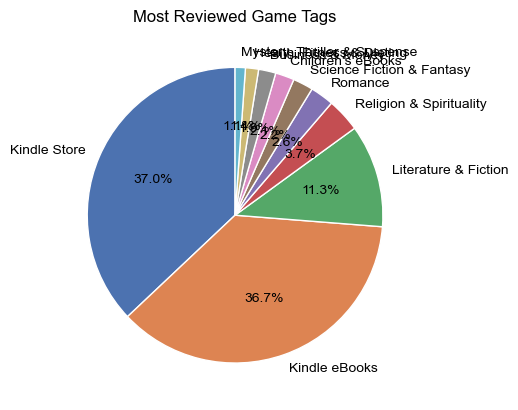

In [117]:
#Pie chart with the distribution of all categories

categories = meta_data['category']
count_list = []
for i in categories:
    for j in i:
        count_list.append(j)

sorted_categories = pd.value_counts(np.array(count_list))
sorted_categories = sorted_categories.sort_values(ascending=False)
print("Series Size ", sorted_categories.size)
print("Average Common Category ", sorted_categories.mean())

# Create a chart to help us see our results
genre_slice = sorted_categories.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
title = 'Most Reviewed Game Tags'
title_text = plt.title(title)
title_text.set_color('black')

#Set different colors for each label font
pchart = plt.pie(genre_slice, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 10, 'color': 'black'})

Series Size  199
Average Common Category  2555.396984924623


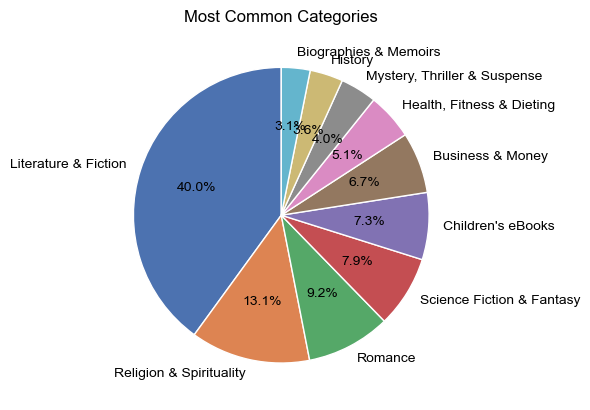

In [118]:
#Pie chart with the distribution of all categories except 'Kindle Store' and 'Kindle eBooks'

count_list = []
for sublist in categories:
    for item in sublist:
        if item not in ['Kindle Store', 'Kindle eBooks']:
            count_list.append(item)

# Count the occurrences of each category
sorted_categories = pd.value_counts(np.array(count_list))
sorted_categories = sorted_categories.sort_values(ascending=False)

print("Series Size ", sorted_categories.size)
print("Average Common Category ", sorted_categories.mean())

# Create a chart to visualize the results
genre_slice = sorted_categories.head(10)
labels = genre_slice.keys()

fig, ax = plt.subplots()
title = 'Most Common Categories'
title_text = plt.title(title)
title_text.set_color('black')

# Plot the pie chart
pchart = plt.pie(genre_slice, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90, textprops={'fontsize': 10, 'color': 'black'})

In [125]:
meta_data['details'].tolist()[0]

{'File Size:': '295 KB',
 'Print Length:': '113 pages',
 'Publisher:': 'FuturesPast Editions (October 14, 2001)',
 'Publication Date:': 'October 14, 2001',
 'Language:': 'English',
 'ASIN:': 'B000FA5KKA',
 'Word Wise:': 'Enabled',
 'Lending:': 'Enabled'}